Importing the Dependencies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Datasets

In [11]:
df=pd.read_csv('/content/Housing.csv')

In [12]:
print(df)

        price  area  bedrooms  bathrooms  ...  airconditioning parking prefarea furnishingstatus
0    13300000  7420         4          2  ...              yes       2      yes        furnished
1    12250000  8960         4          4  ...              yes       3       no        furnished
2    12250000  9960         3          2  ...               no       2      yes   semi-furnished
3    12215000  7500         4          2  ...              yes       3      yes        furnished
4    11410000  7420         4          1  ...              yes       2       no        furnished
..        ...   ...       ...        ...  ...              ...     ...      ...              ...
540   1820000  3000         2          1  ...               no       2       no      unfurnished
541   1767150  2400         3          1  ...               no       0       no   semi-furnished
542   1750000  3620         2          1  ...               no       0       no      unfurnished
543   1750000  2910         3 

In [14]:
df.shape

(545, 13)

In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Exploratory Data Analysis

In [19]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Checking the correlation between the various features

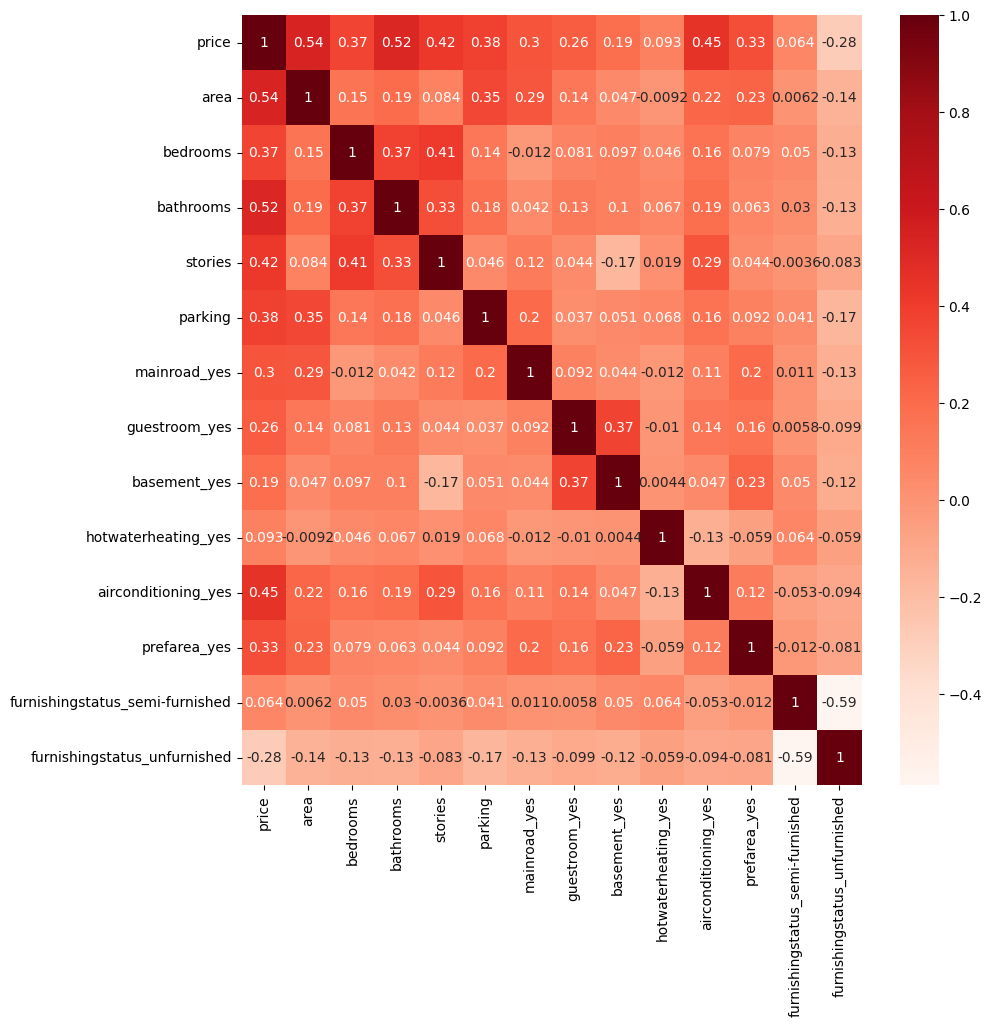

In [23]:
df_encoded = pd.get_dummies(df, drop_first=True)
cor = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Splitting the dataset

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['price'] = scaler.fit_transform(df[['price']])  # Ensure 'price' is 2D for fit_transform

In [36]:
X=df.drop(['price'],axis=1)
Y=df['price']

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(545, 13) (436, 13) (109, 13)


In [38]:
# Applying the XGBRegressor
model=XGBRegressor()
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
model.fit(X_train_encoded,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
# Evaluation Of Model on train data
training_prediction=model.predict(X_train_encoded)
print(training_prediction)

[-7.15316057e-01 -2.66487688e-01 -1.13165081e+00  7.02834427e-02
 -2.04681695e-01  1.26964891e+00 -9.77066636e-01 -1.12775588e+00
  1.15689766e+00 -1.32487976e-05 -7.69798338e-01 -9.77136791e-01
  6.71283662e-01  5.59824467e-01  1.66419888e+00 -3.58306110e-01
  2.58239061e-01 -4.06990834e-02  1.64438725e+00 -3.03130597e-01
 -3.07746291e-01 -1.16394031e+00  2.57077247e-01 -1.94207832e-01
 -4.53653127e-01 -4.15006280e-01  1.08226728e+00  2.39394045e+00
 -3.99544500e-02 -8.24409783e-01 -5.30783057e-01 -8.97907436e-01
 -1.33340406e+00 -3.07555526e-01 -3.02747250e-01 -9.65941727e-01
  7.46485591e-02 -6.03630543e-01 -1.53939056e+00  1.71986377e+00
 -3.79775167e-01  4.00451183e+00  2.02065468e+00  1.38711238e+00
 -3.96767914e-01 -8.25052321e-01 -2.38061711e-01 -6.24439299e-01
 -7.53421009e-01 -1.23953462e+00  6.33237123e-01 -3.60208303e-01
 -4.91910994e-01 -8.24720681e-01 -3.18517447e-01  2.93389618e-01
 -6.02730274e-01 -5.27862906e-01 -5.81233621e-01 -3.19945186e-01
  1.38334203e+00 -2.42613

In [41]:
# Calculating the difference between the actual and trained values using R square error
error_score=metrics.r2_score(Y_train,training_prediction)
print("R squared error : ",error_score)

R squared error :  0.9999974593603852


In [40]:
# calculating the mean absolute error
mae=metrics.mean_absolute_error(Y_train,training_prediction)
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  0.0010868912975093691


In [42]:
# checking the model on test data
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
test_prediction=model.predict(X_test_encoded)

In [43]:
# calculting the R and MAE score
error_score=metrics.r2_score(Y_test,test_prediction)
print("R squared error : ",error_score)

R squared error :  0.9989058901538931


In [44]:
# calculating the mae score
mae=metrics.mean_absolute_error(Y_test,test_prediction)
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  0.014008315572069184
